Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Roman Zhmurin"
COLLABORATORS = "razhmurin@edu.hse.ru"

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        LI = 0
        yi = self.yk
        xj = self.xk
        for i in range(len(yi)):
            l = 1
            for j in range(len(xj)):
                if i == j:
                    l = l
                else:
                    l = l * (x - xj[j]) / (xj[i] - xj[j])
            LI = LI + yi[i] * l
        return LI

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


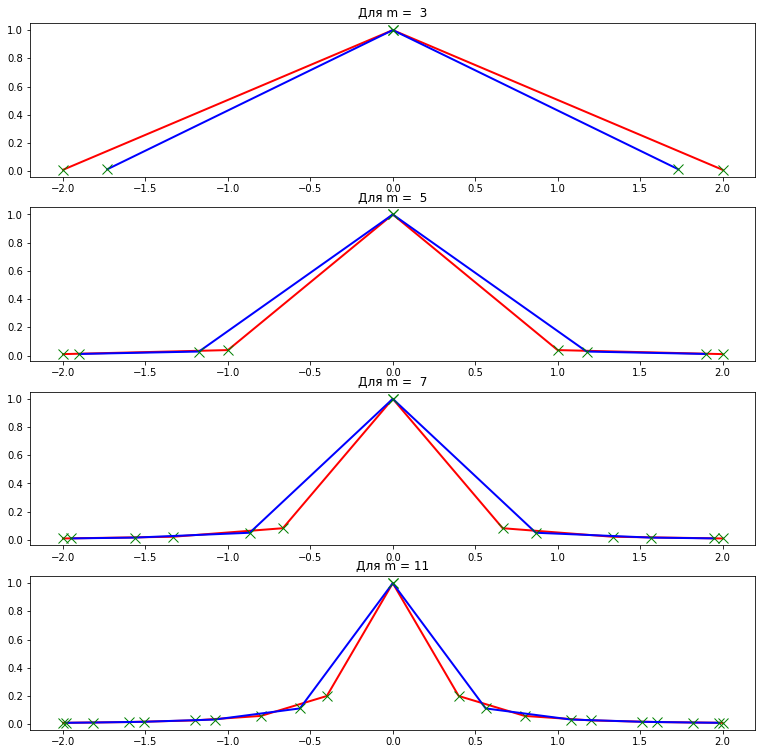

In [32]:
from math import  cos, pi
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(13, 13))
i = 0
for m in [3, 5, 7 , 11]:
    xx = np.linspace(-2, 2, m)
    yy = runge_func(xx)
    lagr = LagrangeInterpolator(xx, yy)
    axs[i].plot(xx, np.asarray([lagr(xval) for xval in xx], dtype=float),
                'r-', linewidth=2)
    axs[i].plot(xx, yy, 'gx', ms = 10)
    axs[i].set(title = 'Для m = %2d' % m)
    i += 1
i = 0
for m in [3, 5, 7, 11]:
    xx = [2 * cos((2 * k - 1) * pi / (2 * m))  for k in range(1, m + 1)]
    xx = np.asarray([2 * cos((2 * k - 1) * pi / (2 * m))  for k in range(1, m + 1)], dtype=float)
    yy = runge_func(xx)
    lagr = LagrangeInterpolator(xx, yy)
    axs[i].plot(xx, np.asarray([lagr(xval) for xval in xx], dtype=float),
                'b-', linewidth=2)
    axs[i].plot(xx, yy, 'gx', ms = 10)
    i += 1